# Context

This notebook presents an **exploratory data analysis** of WIDS Datathon 2021. In the visualization, I applied some lessons I learned by reading the book  "**<a href="https://www.storytellingwithdata.com/books">Storytelling with Data</a>**" written by Cole Knaflic  (*if you hadn't read it. I recommend it!!*). Before initializing our analysis, I will briefly present the WiDS and the WiDS Datathon 2021. Let's go!?!

## What is WiDS?

<a href="https://www.widsconference.org/">WiDS (Women in Data Science)</a> is an initiative founded at Stanford in 2015 that aims to inspire and educate Data Sciences worldwide,  regardless of gender, and to support women in the field. 


## WiDS Datathon


In 2021, WiDS announced its fourth <a href="https://www.kaggle.com/c/widsdatathon2021">Datathon</a> focused on models to determine whether a patient admitted to an Intensive Care Unit (ICU) has been diagnosed with a particular type of diabetes, Diabetes Mellitus. 


#### Diabetes Mellitus

This is a metabolic disease characterized by elevated blood glucose levels (or blood sugar), which can occur when our body becomes resistant to insulin, or our pancreas produces little insulin. There are two types of diabetes [<a href="https://www.who.int/health-topics/diabetes#tab=tab_1"> REF </a>]. 

- Type 1 diabetes: occurs when our immune system attacks the beta cells. Consequently, they do not produce or produces a little insulin. So, the glucose stays in the blood instead of being used as energy. 
- Type 2 diabetes: occurs when the body becomes resistant to insulin or doesn't make enough insulin.


Some of the risk factors for diabetes are high blood pressure, weight, etc. And some of the consequences are renal and hepatic diseases.

# Exploratory Data Analysis

Now, let's explore the data!! 

The datathon provided training and testing datasets. Here, we will explore the training one.

In [1]:
# Importing the libraries

import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import utils as ul

In [2]:
%matplotlib inline
sns.set(style="white")
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [3]:
# Reading Data

url = "https://raw.githubusercontent.com/chainao/datasets/main/wids/TrainingWiDS2021.csv"
df = pd.read_csv(url, sep=",") # Training data

url = "https://raw.githubusercontent.com/chainao/datasets/main/wids/DataDictionaryWiDS2021.csv"
data_dict = pd.read_csv(url, sep=",") # Dict with features information

The dataset contains data from patients in the first 24 hours of intensive care.

Some of the information provided are gender, age, weight and height. Other features refer to the patient's origin and monitoring rates in the first 24 hours of intensive care (e.g., glucose_appache). The target feature is "diabetes_mellitus", which indicates whether the patient was diagnosed with diabetes mellitus or not.

The table below shows the variable names and their respective descriptions.

In [4]:
pd.set_option('display.max_rows', 500) 
pd.set_option('max_colwidth', 500) 
data_dict[['Variable Name', 'Description']]

,Variable Name,Description
0,encounter_id,Unique identifier associated with a patient unit stay
1,hospital_id,Unique identifier associated with a hospital
2,age,The age of the patient on unit admission
3,bmi,The body mass index of the person on unit admission
4,elective_surgery,Whether the patient was admitted to the hospital for an elective surgical operation
5,ethnicity,The common national or cultural tradition which the person belongs to
6,gender,The genotypical sex of the patient
7,height,The height of the person on unit admission
8,hospital_admit_source,The location of the patient prior to being admitted to the hospital
9,icu_admit_source,The location of the patient prior to being admitted to the unit


The dataset is composed of **130.157 instances and 180 features**, including the target (diabetes_mellitus). See in table below!

In [5]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Data columns (total 181 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   130157 non-null  int64  
 1   encounter_id                 130157 non-null  int64  
 2   hospital_id                  130157 non-null  int64  
 3   age                          125169 non-null  float64
 4   bmi                          125667 non-null  float64
 5   elective_surgery             130157 non-null  int64  
 6   ethnicity                    128570 non-null  object 
 7   gender                       130091 non-null  object 
 8   height                       128080 non-null  float64
 9   hospital_admit_source        96959 non-null   object 
 10  icu_admit_source             129917 non-null  object 
 11  icu_id                       130157 non-null  int64  
 12  icu_stay_type                130157 non-null  object 
 13

157 variables are float, 18 are object and 6 are int (including diabetes_mellitus).

In [6]:
df.dtypes.value_counts()

float64    157
int64       18
object       6
dtype: int64

The table below shows the first 5 instances of the base. We can observe that there are some "NaN" values.

In [7]:
df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,1

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,130157.0,65079.000000,37573.233831,1.000000,32540.000000,65079.000000,97618.000000,130157.000000
encounter_id,130157.0,213000.856519,38109.828146,147000.000000,180001.000000,213014.000000,246002.000000,279000.000000
hospital_id,130157.0,106.102131,63.482277,1.000000,49.000000,112.000000,165.000000,204.000000
age,125169.0,61.995103,16.822880,0.000000,52.000000,64.000000,75.000000,89.000000
bmi,125667.0,29.110260,8.262776,14.844926,23.598006,27.564749,32.803127,67.814990
elective_surgery,130157.0,0.189840,0.392176,0.000000,0.000000,0.000000,0.000000,1.000000
height,128080.0,169.607219,10.833085,137.200000,162.500000,170.100000,177.800000,195.590000
icu_id,130157.0,662.428344,304.259843,82.000000,427.000000,653.000000,969.000000,1111.000000
pre_icu_los_days,130157.0,0.839933,2.485337,-0.250000,0.045833,0.155556,0.423611,175.627778
readmission_status,130157.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Correlation

Here, we calculated the correlation between all variables, and we also calculated the correlation only between the target variable (diabetes_mellitus) and other variables.

### Correlation between all variables

The heatmap below shows the correlation between all variables (the darker, the greater the correlation). We can see that there is a low correlation between most variables.

[[]]

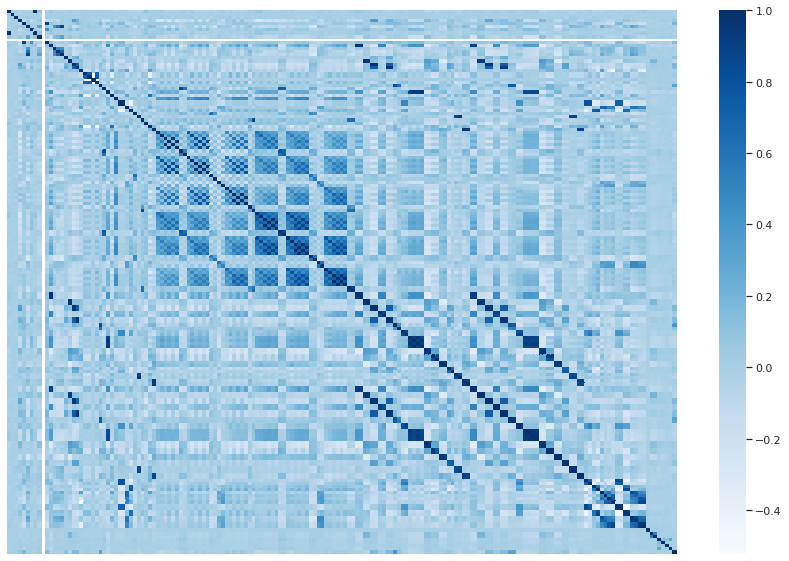

In [9]:
columns = df.columns.values
corr = df[columns].corr(method='spearman')

plt.figure(figsize = (15,10))
g = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='Blues')

g.set(yticklabels=[])
g.set(xticklabels=[])

### Correlation between diabetes_mellitus and the other variables

The heatmap below shows the correlation between diabetes_mellitus and the other variables with a greater than 0.023497 (third quartile) correlation.

We observed that the variables with the highest correlation with diabetes_mellitus are those related to glucose (d1_glucose_max, glucose_apache), body mass index and weight.

In [10]:
corr_diabetes = corr['diabetes_mellitus']
df_corr_diabetes = pd.DataFrame(data={'Feature' : corr_diabetes.index,
                                      'Correlation': corr_diabetes.values})
df_corr_diabetes = df_corr_diabetes.sort_values(by='Correlation', ascending=False)
df_corr_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Correlation,174.0,0.016862,0.107257,-0.109466,-0.026431,-0.003337,0.024229,1.0


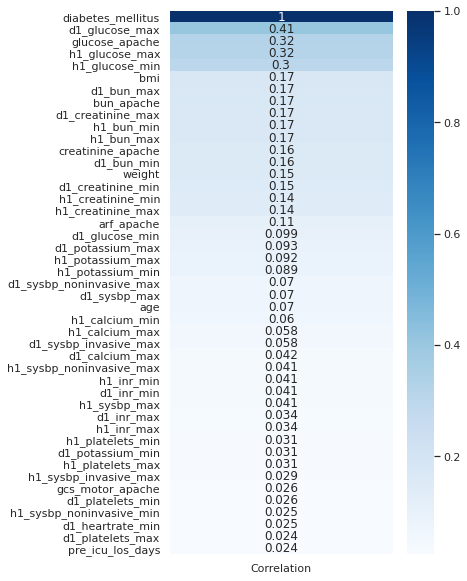

In [11]:
df_corr_diabetes = df_corr_diabetes.loc[df_corr_diabetes['Correlation'] > 0.023497]
labels = df_corr_diabetes['Feature']
df_corr_diabetes = df_corr_diabetes.drop(['Feature'], axis=1)
plt.figure(figsize = (5,10))
g = sns.heatmap(df_corr_diabetes, annot=True, cmap='Blues', yticklabels=labels.to_numpy())

As there are many variables (180), we selected a group to perform a more deeply analysis. Firstly, in addition to the distribution of the target variable (diabetes_mellitus), let's take a more detailed look at some of the more general ones, such as gender, ethnicity, etc. Then, we will explore those that are most correlated with diabetes_mellitus according to the image above (glucose_apache, bmi). We will also explore others related to some complications associated with diabetes (according to medicine). We will explain throughout the analysis.

## General Variables

### Diabetics and non-diabetics

The plot below shows 22% of the patients have diabetes.

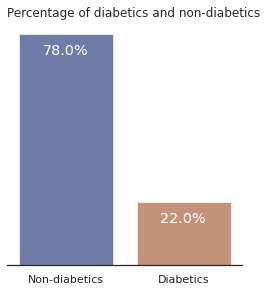

In [12]:
ul.bar_plot(df, 'diabetes_mellitus', ['Non-diabetics', 'Diabetics'], order=[0, 1], height=4, fontsize='large', palette='dark', 
            title='Percentage of diabetics and non-diabetics', alpha=0.6)

### Gender

There are 8% more men than women (54% men and 46% women).

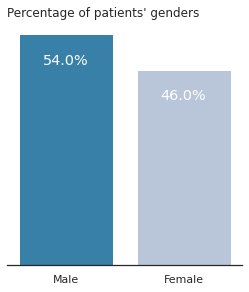

In [13]:
ul.bar_plot(df, 'gender', ['Male', 'Female'], order=['M', 'F'], height=4, fontsize='large', 
            title="Percentage of patients' genders")

Now, let's consider only the group of people with diabetes and look at the percentage of each gender in this subgroup of people.


The plot below shows such a distribution. There are 10% more men with diabetes. Considering that this distribution is similar to the gender distribution in the whole base (plot above), it is not possible to draw a robust conclusion as to whether people of a specific gender are more likely to have diabetes.

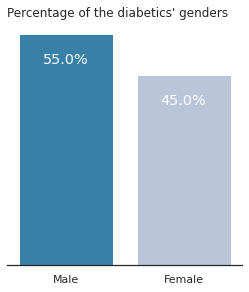

In [14]:
ul.bar_plot(df.loc[df['diabetes_mellitus'] == 1], 'gender', ['Male', 'Female'], order=['M', 'F'], height=4, 
            fontsize='large', title="Percentage of the diabetics' genders")

### Ethnicity

How is the ethnic distribution? Are people of a certain ethnicity more likely to acquire the disease?

We will first examine the ethnic distribution of all patients and then look at each group, diabetic and non-diabetic. Most patients (78%) are "Caucasian", followed by "African American" (11%) and "Other / Unknown" (5%). The smallest part of them (1%) are from "Native American".

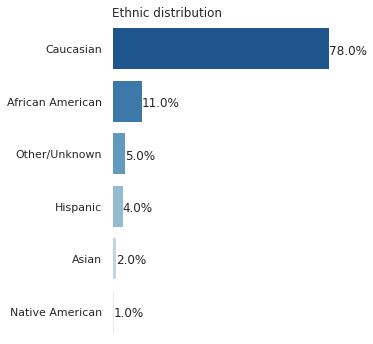

In [15]:
ul.horizontal_bar_plot(df, 'ethnicity', "Ethnic distribution")

Considering only people with diabetes, the percentage of "Caucasian" is 74%, while "African American" is 13%, while "Other / Unknown" is 6%.

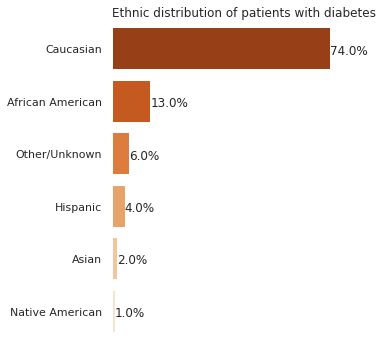

In [16]:
ul.horizontal_bar_plot(df.loc[df['diabetes_mellitus'] == 1], 'ethnicity', "Ethnic distribution of patients with diabetes",
                       palette='Oranges_r')

### Age

Below, we can see the age distribution of diabetics and non-diabetics. Most patients are between 60 and 80 years old.

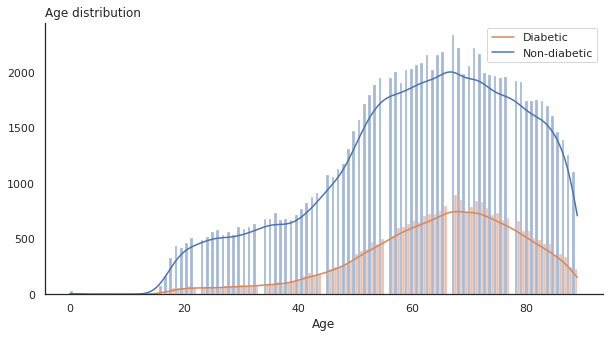

In [17]:
ul.hist_plot(df, 'age', 'Age', title='Age distribution', hue='diabetes_mellitus', labels=['Diabetic', 'Non-diabetic'])

### Days before being admitted to the ICU

Here, we observe the number of days the patients are admitted to the hospital before going to the ICU. Both kinds of patients, diabetics and non-diabetics, spent less than a day before being admitted to the ICU.

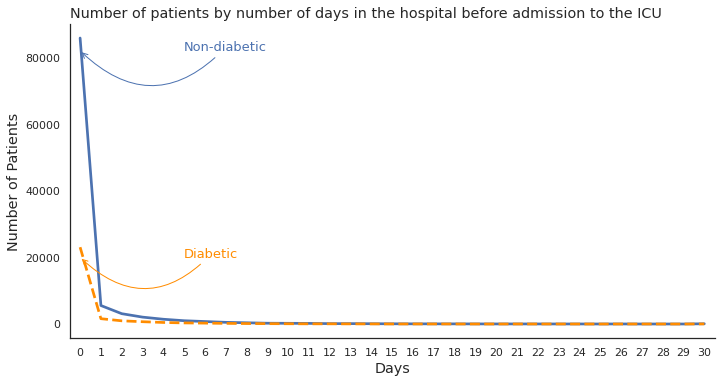

In [18]:
df_aux = df
days = []
for index, row in df_aux.iterrows():  
    if int(row['pre_icu_los_days']) < 30:
        days.append(int(row['pre_icu_los_days']))
    else:
        days.append(30)
        
df_aux['pre_days'] = days

ul.line_plot(df_aux, 'pre_days', 'diabetes_mellitus', xlabel='Number of Patients', ylabel='Days',
             title='Number of patients by number of days in the hospital before admission to the ICU',
             labels=["Diabetic", "Non-diabetic"])

## Health conditions related to diabetes

We will now explore the variables with the highest correlation with diabetes_mellitus, as we have already shown in one of the heat maps above. We also investigated some variables that, even though they did not show any major correlations, are related to some complications related to the disease according to medicine.

### Hyperglycemia

The increase in the glucose rate is directly related to diabetes. Check the classification for each blood glucose level on fasting.

| Classification | Blood Glucose Level ($mg/dL$) |
| --- | --- | 
| Below | < 70 |
| Normal | 70 - 100 |
| Prediabetes Alert| 100 - 126 |
| Diabetes Alert| > 126 |

It is important to keep in mind that a single exam does not decide the diagnosis of diabetes or prediabetes, but serves as an alert. There is a need to repeat the exam for confirmation.

One of the variables related to the glucose rate of the patients is glucose_apache, which is the glucose concentration measured in the first 24 hours that resulted in the highest APACHE III score. The distribution of glucose_apache is shown in the image below.

**Obs:** in the analyzes, we consider that the tests were done on fasting, so, for the classification of glucose rates, we will follow what we pointed out above.

The classification of the glucose rate for most patients is in the ranges: normal and pre-diabetes. A smaller part of the patients had glucose lower than indicated and the other part above. The latter would be on a diabetes alert range. Again, be aware that these patients are not necessarily diabetic (to have such a diagnosis, the exam would have to be repeated).

Note that of the patients who the "diabetes alert" range, the difference in the proportion of those who really have diabetes, compared to those who do not, is smaller than this proportion in the "normal" range. And more, from the value 250, more or less, the amount of really diabetic patients is higher than non-diabetics (orange line above blue) for some blood glucose levels.

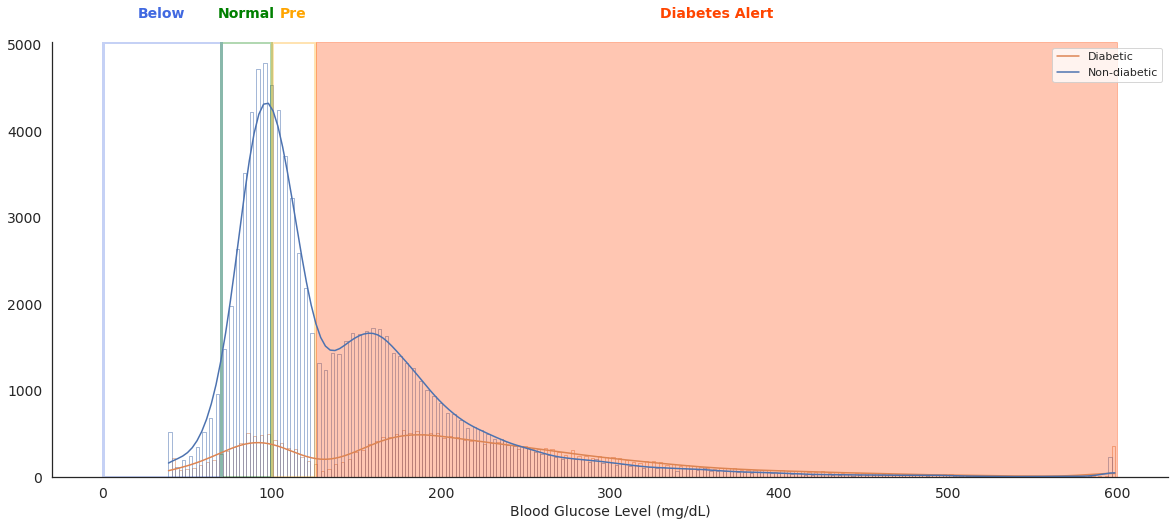

In [19]:
ul.hist_plot_annotated(df, 'glucose_apache', 'Blood Glucose Level (mg/dL)', 
                  ranges = [[0,69.9], [70,99.9], [100,125.9], [126,600]],
                  classifications = ['Below', 'Normal', 'Pre', 'Diabetes Alert'],
                  colors =  ['royalblue','green','orange', 'orangered'],
                  title='BMI distribution',
                  fontsize=14, hue='diabetes_mellitus',
                  labels=['Diabetic', 'Non-diabetic'])

The plot below shows that only 14% of patients in "normal" or "below" classifications also did have diabetes.

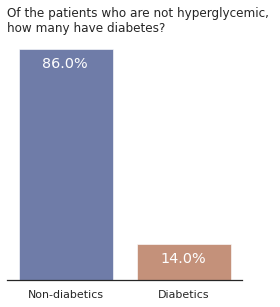

In [20]:
ul.bar_plot(df.loc[df['glucose_apache'] < 100], 'diabetes_mellitus', ['Non-diabetics', 'Diabetics'], order=[0, 1], height=4, 
            fontsize='large', palette='dark',
            title='Of the patients who are not hyperglycemic, \nhow many have diabetes?', alpha=0.6)

Considering only those in the "diabetes alert" range, 34% of them actually had diabetes.

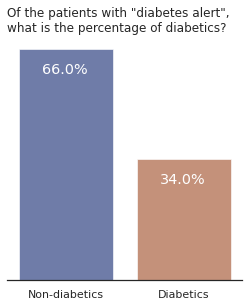

In [21]:
ul.bar_plot(df.loc[df['glucose_apache'] >= 126], 'diabetes_mellitus', ['Non-diabetics', 'Diabetics'], order=[0, 1], height=4, 
            fontsize='large', palette='dark', 
            title='Of the patients with "diabetes alert", \nwhat is the percentage of diabetics?', alpha=0.6)

In [22]:
percent = df.loc[df['glucose_apache'] >=126]['diabetes_mellitus'].value_counts(normalize=True)

df_scores = pd.DataFrame(data={'Comorbidity' : ['Hyperglycemia'],
                               'Diabetic': [percent[1]], 
                               'Non-diabetic': [percent[0]]})

Other glucose-related variables indicate the patient's minimum and maximum glucose rate in one hour. So, we made another variable that represents the difference between these two. The histogram below shows the distribution of this difference. Note that when the value is close to 100, there is a smaller proportional difference between diabetics and non-diabetics.

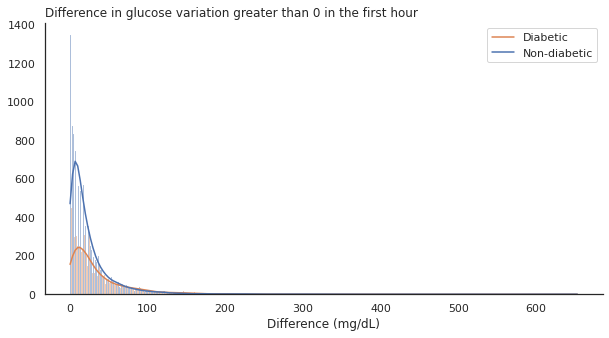

In [23]:
df_aux = df.loc[(df['h1_glucose_max'].notnull()) & (df['h1_glucose_min'].notnull())]
df_aux['h1_glucose_diff'] = df_aux['h1_glucose_max'] - df_aux['h1_glucose_min']

ul.hist_plot(df_aux.loc[df_aux['h1_glucose_diff'] > 0], 'h1_glucose_diff', 'Difference (mg/dL)', hue='diabetes_mellitus',
             title='Difference in glucose variation greater than 0 in the first hour', labels=['Diabetic', 'Non-diabetic'])

We also have information about the highest and lowest glucose levels in the first 24 hours. We also made another variable that represents the difference between these two values. The distribution is shown in the histogram below. And again, when the proportional difference between diabetics and non-diabetics decreases when the variable value is close to 100.

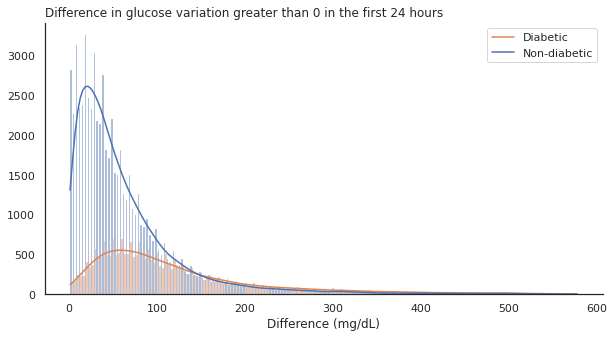

In [24]:
df_aux = df.loc[(df['d1_glucose_max'].notnull()) & (df['d1_glucose_min'].notnull())]
df_aux['d1_glucose_diff'] = df_aux['d1_glucose_max'] - df_aux['d1_glucose_min']

ul.hist_plot(df_aux.loc[df_aux['d1_glucose_diff'] > 0], 'd1_glucose_diff', 'Difference (mg/dL)', hue='diabetes_mellitus',
             title='Difference in glucose variation greater than 0 in the first 24 hours', labels=['Diabetic', 'Non-diabetic'])

### Obesity

One of the diseases associated with diabetes is obesity [<a href="https://www.diabetes.co.uk/diabetes-and-obesity.html">REF</a>]. One of the factors considered in the diagnosis of obesity is the Body Mass Index (BMI), which is a relation between weight and height, according to the equation below:

$$BMI = \frac{weight}{height²}$$

The BMI classification is shown in the table below  <a href="https://www.cdc.gov/obesity/adult/defining.html">[REF]</a>:

| Classification | BMI ($kg/m²$) |
| --- | --- | 
| Underweight | < 18,5 |
| Normal | 18,5 - 24,9 |
| Overweight | 25 - 29,9 |
| Obesity I | 30 - 34,9 |
| Obesity II | 35 - 39,9 |
| Obesity Tipo III | >= 40 |

For our analysis, we considered these classifications to relate obesity to diabetes.

**Now let's go to the data!!!** 


The histogram below shows the distribution of patients' BMI. Most of them are in the classifications: normal and overweight. A small proportion of patients with normal BMI were also considered diabetic. Also, note that a large proportion of patients with obesity are also diabetic. As the level of obesity increases, the proportional difference between diabetics and non-diabetics decreases.

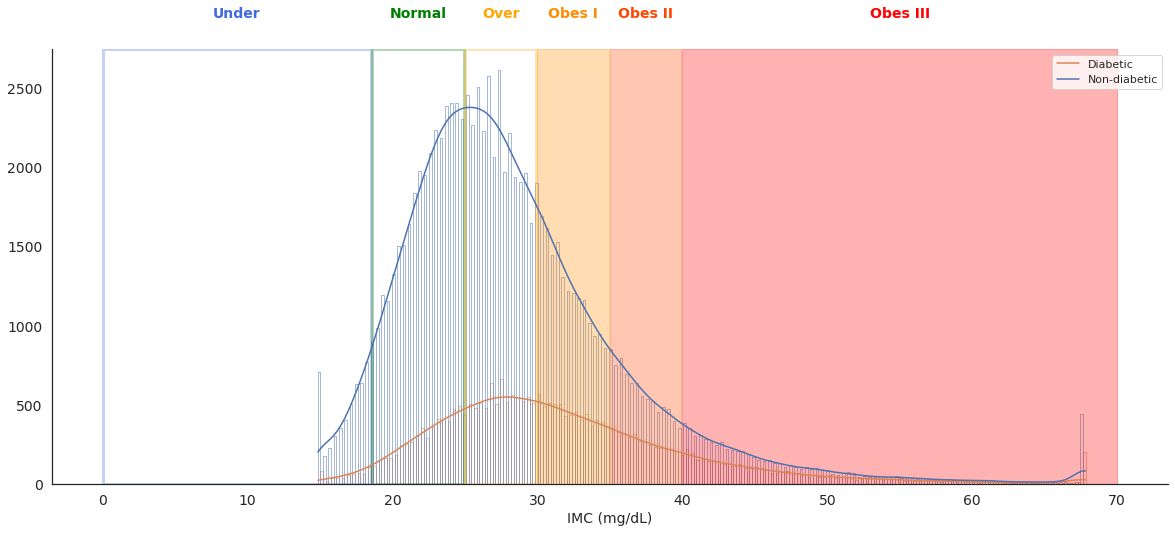

In [25]:
ul.hist_plot_annotated(df, 'bmi', 'IMC (mg/dL)', 
                  ranges = [[0,18.5], [18.6,24.9], [25,29.9], [30,34.9], [35,39.9], [40, 70]],
                  classifications = ['Under', 'Normal', 'Over', 'Obes I', 'Obes II', 'Obes III'],
                  colors =  ['royalblue','green', 'orange', 'darkorange','orangered', 'red'],
                  title="Distribution of patients' BMI",
                  fontsize=14, hight=2500, hue='diabetes_mellitus',
                  labels=['Diabetic', 'Non-diabetic'])

Considering only patients with some level of obesity, 30% of them are also diabetic.

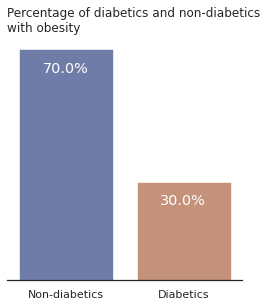

In [26]:
ul.bar_plot(df.loc[df['bmi'] >= 30], 'diabetes_mellitus', ['Non-diabetics', 'Diabetics'], order=[0, 1], height=4, 
            fontsize='large', palette='dark',
            title='Percentage of diabetics and non-diabetics \nwith obesity', alpha=0.6)

In [27]:
percent = df.loc[df['bmi'] >= 30]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidity' : 'Obesity',
                              'Diabetic': percent[1], 
                              'Non-diabetic': percent[0]},
                              ignore_index=True)

Considering only patients with normal or below-expected BMI, only 14% of them are diabetic. 

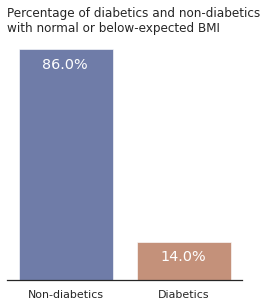

In [28]:
ul.bar_plot(df.loc[df['bmi'] < 25], 'diabetes_mellitus', ['Non-diabetics', 'Diabetics'], order=[0, 1], height=4, 
            fontsize='large', palette='dark',
            title='Percentage of diabetics and non-diabetics \nwith normal or below-expected BMI', alpha=0.6)

In the plot below, we can see the percentage of patients in each classification. As already noted in the histogram, the classification of most of them is overweight or normal, followed by the three types of diabetes and, finally, the smallest percentage of them are classified as underweight.

In [ ]:
df_aux = ul.bmi_classification(df, classfication=['Underweight', 'Normal', 'Overweight', 'Obesity I', 
                                                  'Obesity II', 'Obesity III'])
ul.horizontal_bar_plot(df_aux, 'imc_classification', "Percentage of patients in each BMI classification")

The graph below shows the percentage of diabetics and non-diabetics in each BMI classification. The percentage of people with diabetes increases proportionally to the BMI. "Underweight" and "Normal", which represent the lowest BMI values, are those with the lowest proportion of diabetics in relation to non-diabetics. "Overweight" has an intermediate value, and as the level of obesity increases, the percentage of diabetics also increases.

In [ ]:
labels=['Diabetic', 'Non-diabetic']

df_aux['diabetes_mellitus'] = df_aux['diabetes_mellitus'].replace(0, labels[1])
df_aux['diabetes_mellitus'] = df_aux['diabetes_mellitus'].replace(1, labels[0])

ul.grouped_bar_plot(df_aux, 'imc_classification', 'diabetes_mellitus', ['Non-diabetic', 'Diabetic'], height = 8, labels=labels)  

Below, we can see the same information we saw in the graph above, but in another visualization (*you can choose the one you think is best*).

In [ ]:
sns.set(style="whitegrid")

g = sns.FacetGrid(df_aux, col="imc_classification", height=4, col_wrap=3, 
                  col_order=['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'])
g.map(sns.countplot, 'diabetes_mellitus', palette='dark', alpha=0.6)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "")

sns.set(style="white")


### Kidney Failure

Another factor that may be associated with diabetes is kidney failure. Exposure to high glucose levels for long periods can cause kidney failure. Chronic kidney disease associated with diabetes (diabetic nephropathy), for instance, is a complication that appears gradually and asymptomatically. Some of the consequences are the loss of kidney function, with the need for treatment through dialysis or transplantation. [<a href="https://www.niddk.nih.gov/health-information/diabetes/overview/preventing-problems/diabetic-kidney-disease">REF</a>]


**Now, let's go to the data!!!** 

One of the variables that we can explore in this context is arf_apache, which indicates whether the patient had any kidney failure during the first 24 hours in the ICU. Note in the graph below that only 3% of patients had a failure in that period.

In [ ]:
ul.bar_plot(df, 'arf_apache', ['Without Failure', 'With Failure'], order=[0, 1], height=4, fontsize='large', palette='dark',
            title='Percentage of patients with or without renal \nfailure in the first 24 hours at the unit', 
            alpha=0.6)

Considering only patients who had kidney failure (those 3%), 48% are diabetic, as we can see in the graph below.

In [ ]:
ul.bar_plot(df.loc[df['arf_apache'] == 1], 'diabetes_mellitus', ['Non-diabetics', 'Diabetics'], order=[0, 1], height=4, 
            fontsize='large', palette='dark',
            title='Of the patients who had kidney failure in \nthe first 24 hours at the unit, how many \nhave diabetes?', alpha=0.6)

In [ ]:
percent = df.loc[df['arf_apache'] == 1]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidity' : 'Kidney Failure',
                              'Diabetic': percent[1], 
                              'Non-diabetic': percent[0]},
                              ignore_index=True)

### Liver Failure

Liver failure concerns a group of conditions that compromise the liver. They are also associated with diabetes, which can cause and arise as a complication of such disease.[<a href="https://clinical.diabetesjournals.org/content/28/4/139">REF</a>].

**Let's go to the data!!**


So, we decided to check if any patients in our dataset have any liver failure. And if (s)he has, is (s)he also a diabetic?

#### Cirrhosis

Cirrhosis is one of the liver diseases that can be associated with diabetes <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2653324/">[REF]</a>.  

The graph below shows that 2% of patients have cirrhosis.

In [ ]:
ul.bar_plot(df, 'cirrhosis', ['Without Cirrhosis', 'With Cirrhosis'], order=[0, 1], height=4, fontsize='large', palette='dark',
            title='Patients with or without cirrhosis', alpha=0.6)

When we consider only people who have cirrhosis, we see that 27% of them are also diabetic (graph below).

In [ ]:
ul.bar_plot(df.loc[df['cirrhosis'] == 1], 'diabetes_mellitus', ['Non-diabetics', 'Diabetics'], order=[0, 1], height=4, 
         fontsize='large', palette='dark', title='Of the patients with or without cirrhosis, \nhow many are diabetic?', 
         alpha=0.6)

In [ ]:
percent = df.loc[df['cirrhosis'] == 1]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidity' : 'Cirrhosis',
                              'Diabetic': percent[1], 
                              'Non-diabetic': percent[0]},
                              ignore_index=True)

#### Cirrhosis and other liver failures

The graph below shows that 1% of the patients in addition to cirrhosis have other liver complications.

In [ ]:
ul.bar_plot(df, 'hepatic_failure', ['Without Failure', 'With Failure'], order=[0, 1], height=4, fontsize='large', palette='dark',
            title='Percentage of patients with any liver failures \nin addition to cirrhosis', alpha=0.6)

And of those who had cirrhosis and other liver failures, what is the percentage of diabetics and non-diabetics? We can see (in the graph below) that 25% of patients suffered from these complications are diabetic.

In [ ]:
ul.bar_plot(df.loc[df['hepatic_failure'] == 1], 'diabetes_mellitus', ['Non-diabetics', 'Diabetics'], order=[0, 1], height=4, 
            fontsize='large', palette='dark', 
            title='Of the patients who have liver failure, \nhow many are diabetic?', alpha=0.6)

In [ ]:
percent = df.loc[df['hepatic_failure'] == 1]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidity' : 'Liver failures',
                              'Diabetic': percent[1], 
                              'Non-diabetic': percent[0]},
                              ignore_index=True)

### Urea

The increase of blood urea nitrogen (BUN) levels is a late sign of kidney disease in patients with diabetes.<a href="https://www.kidney.org/atoz/content/diabetes">[REF]</a>. The blood urea reference value varies between 8 and 20 mg/dL.

**Let's go to the data!?!**

The graph below shows the BUN distribution of the patients. Most of them have BUN levels within the normal range (between 8 and 20 mg/dL). We observed that in this range, the proportional difference between diabetics and non-diabetics is more significant than when the BUN is greater than 20 mg/dL.

In [ ]:
ul.hist_plot(df, 'bun_apache', 'BUN Apache', hue='diabetes_mellitus', title='Bun apache distribution of all patients',
            labels=['Diabetic', 'Non-diabetic'])

The histogram below shows only patients with a urea level above the adequate level (20 mg/dL). Thus, we can see more clearly that a considerable proportion of patients in this range are also diabetic.

In [ ]:
ul.hist_plot(df.loc[df['bun_apache'] > 20], 'bun_apache', 'Bun Apache', hue='diabetes_mellitus',
             title='Distribution of bun apache of all patients above 20 mg/dL', labels=['Diabetic', 'Non-diabetic'])

In the graph below, we can better observe the proportion of diabetic and non-diabetic with a urea level above 20 mg/dL, 29% of them have diabetes.

In [ ]:
ul.bar_plot(df.loc[df['bun_apache'] > 20], 'diabetes_mellitus', ['Non-diabetics', 'Diabetics'], order=[0, 1], height=4, 
            fontsize='large', palette='dark', 
            title='Of the patients with a high level of urea, \nwhat is the percentage of people with \ndiabetes?', alpha=0.6)

In [ ]:
percent = df.loc[df['bun_apache'] > 20]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidity' : 'High BUN',
                              'Diabetic': percent[1], 
                              'Non-diabetic': percent[0]},
                              ignore_index=True)

If we consider patients with an adequate urea level or below the reference value, we observe that the percentage of diabetics is 20%.

In [ ]:
ul.bar_plot(df.loc[df['bun_apache'] <= 20], 'diabetes_mellitus', ['Non-diabetics', 'Diabetics'], order=[0, 1],
                 height=4, fontsize='large', palette='dark',
               title='Of patients with normal or below BUN reference levels, \nwhat is the percentage of people with diabetes?', alpha=0.6)

We also have information about the highest and lowest BUN levels of patients in the first 24 hours in the ICU. Thus, we calculated the difference between these two values to observe the behavior of this new variable. The histogram of the distribution of such variable is shown below (we plotted the values above 0). Most patients had a difference between the maximum and minimum BUN levels close to 0, however the proportion of non-diabetics in these small ranges is much higher than the diabetics.

In [ ]:
df_aux = df.loc[(df['d1_bun_max'].notnull()) & (df['d1_bun_min'].notnull())]
df_aux['d1_bun_diff'] = df_aux['d1_bun_max'] - df_aux['d1_bun_min']

ul.hist_plot(df_aux.loc[df_aux['d1_bun_diff'] > 0], 'd1_bun_diff', 'Diff BUN', hue='diabetes_mellitus',
             title='Difference in BUN variation greater than zero in the first 24 hours', xlim=[0, 80],
             labels=['Diabetic', 'Non-diabetic'])

In the histogram below, we plotted the distribution of the differences for values greater than 10. We observe that in this range, the proportion of people with diabetes is closer to the non-diabetics.

In [ ]:
ul.hist_plot(df_aux.loc[df_aux['d1_bun_diff'] > 10], 'd1_bun_diff', 'Diff BUN', hue='diabetes_mellitus',
             title='Difference in BUN variation greater than zero in the first 24 hours', xlim=[10, 80],
             labels=['Diabetic', 'Non-diabetic'])

To better understand the proportional difference between diabetics and non-diabetics in this subgroup (maximum BUN - minimum BUN > 10), we plotted the graph below. We see that 36% of patients in these conditions have diabetes. 

In [ ]:
ul.bar_plot(df_aux.loc[df_aux['d1_bun_diff'] > 10], 'diabetes_mellitus', ['Non-diabetic', 'Diabetic'], order=[0, 1], height=4,
            fontsize='large', palette='dark', 
            title='Of the patients with a difference greater than 10 \nin the BUN levels, what is the percentage of \npeople with diabetes?', 
            alpha=0.6)

### Creatinine

Another late sign of kidney disease in people with diabetes is an increase in creatine level.  <a href="https://www.kidney.org/atoz/content/diabetes">[REF]</a>. The normal range of blood creatinine is 0.6 to 1.3 mg/dL.


**Now, let's explore the data!**

Looking at the patients' creatine distribution, we see that most of them have rates between 0 and 2.

In [ ]:
ul.hist_plot(df, 'creatinine_apache', 'Ceatinine Apache', hue='diabetes_mellitus',
             title='Distribution of creatinine in all patients', labels=['Diabetic', 'Non-diabetic'])

Considering only creatine values greater than adequate (greater than 1.3 mg / dL). We see that as the value increases, the difference between the number of non-diabetics and diabetics tends to decrease.

In [ ]:
ul.hist_plot(df.loc[df['creatinine_apache'] > 1.3], 'creatinine_apache', 'Creatinine Apache', hue='diabetes_mellitus',
             title='Distribution of creatinine to patients above the reference level',
             labels=['Diabetic', 'Non-diabetic'])

In the graph below, we see the proportion of diabetic and non-diabetic people, considering patients with creatine levels above the adequate level.


In [ ]:
ul.bar_plot(df.loc[df['creatinine_apache'] > 1.3], 'diabetes_mellitus', ['Non-diabetic', 'Diabetic'], order=[0, 1],
            height=4, fontsize='large', palette='dark',
            title='Of the patients with creatine level above the reference value, \nwhat is the percentage of diabetics?', 
            alpha=0.6)

In [ ]:
percent = df.loc[df['creatinine_apache'] > 1.3]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidity' : 'High Creatine',
                              'Diabetic': percent[1], 
                              'Non-diabetic': percent[0]},
                              ignore_index=True)

The following graph, on the other hand, shows the opposite, the percentage of diabetics and non-diabetics with creatine levels within and below the appropriate level.

In [ ]:
ul.bar_plot(df.loc[df['creatinine_apache'] <= 1.3], 'diabetes_mellitus', ['Non-diabetic', 'Diabetic'], order=[0, 1],
            height=4, fontsize='large', palette='dark',
            title='Of patients with normal creatine level or \nbelow the reference value, what is the \npercentage of diabetics?', 
            alpha=0.6)

### Leukemia

Studies reveal that people who have diabetes have a increased risk of developing blood cancers. One of the types of cancer that can be developed is leukemia <a href="https://ashpublications.org/blood/article/119/21/4845/29936/Increased-incidence-of-non-Hodgkin-lymphoma">[REF]</a>.

**Analyzing the data...**

1% of people were diagnosed with leukemia, as shown in the graph below.

In [ ]:
ul.bar_plot(df, 'leukemia', ['Without Leukemia', 'With Leukemia'], order=[0, 1], height=4, fontsize='large', palette='dark',
            title='Patients with or without leukemia', alpha=0.6)

Of the people who have been diagnosed with leukemia, 23% are also diabetic.

In [ ]:
ul.bar_plot(df.loc[df['leukemia'] == 1], 'diabetes_mellitus', ['Non-diabetic', 'Diabetic'], order=[0, 1], height=4, 
            fontsize='large', palette='dark', title='Of the patients who have leukemia, \nhow many are diabetic?', 
            alpha=0.6)

In [ ]:
percent = df.loc[df['leukemia'] == 1]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidity' : 'Leukemia',
                              'Diabetic': percent[1], 
                              'Non-diabetic': percent[0]},
                              ignore_index=True)

# Lessons from Storytelling with Data

As we said in the beginning, we applied some of the lessons learned in the book "**<a href="https://www.storytellingwithdata.com/books">Storytelling com dados</a>**"  written by Cole Knaflic. We listed some of them below:

## Graphics

- We removed the borders from the graphics, since they are unnecessary.

- We used heat maps to express information in tabular formats, giving visual cues. So, instead (or in addition to the numbers), we convey the relative magnitude of the numbers. We used a color saturation to express the magnitude of the numbers (lighter shades indicate lower values and darker ones, higher values).

- According to Cole, bar graphs are often avoided because they are common, but this is a mistake. She says that they should be used because they are easy to interpret. The public can quickly see which one can see which category is the largest, which is the smallest, and even the incremental difference between the categories. In these analyzes, we use many graphs of this type.

- Another warning given by the author is that it is important that bar graphs have a base line 0. In vertical bars, for example, the x axis crosses the y at base 0. Otherwise, a false visual comparison is obtained.

- In some bar charts that we used to represent percentages (in verticals), we put the numbers inside the bars. According to Cole, it reduces saturation.

- Still in some vertical bar graphs, in those where we put the numbers inside the bars, we omitted the y-axis entirely to show the legend only inside the bars.

- Categorical variables can also be used in horizontal bar charts. They are very useful when the category names are long. In addition, as you read from left to right, you first read the names of the categories and then the data (the bars). So, before the person reaches the data, he already knows what it is about.

- We used the visual order of the data (in the horizontal bar graphs), starting from the category of greater quantity to the smaller one, thus facilitating the reading of the data. In addition to facilitating the visualization of the bar sizes, it is possible to see how much one segment is larger than the other.

- We eliminated the x-axis of the horizontal bar graphs in which the bars are labeled with the respective percentages, thus reducing the redundancy of the information. In those that are not labeled, we move the x-axis upwards, thus facilitating the reading.

- We used a line graph to express continuous data in a temporal order, of days.

- In the line graph, we labeled the data directly, placing the legend next to the data they describe. This reduces the cognitive burden of going back and forth in subtitles.

- In bar charts in general, Cole recommends that the width of the blank spaces be less than the width of the bars. We applied this to our graphics.

- In most graphs, we eliminated grid lines for greater contrast and highlighting the data. We only left the grid lines in one of the BMI classification views because we thought it would be easier to read since we only used a y-axis for three aligned graphs, and we did not legend directly on the bars. However, the lines are thin, and the color is light, not visually competing with the data.

## Colors 

- It is very common, in our graphs, to use green to indicate something positive and red to indicate something negative. However, when we use these two colors in this scenario, it is not accessible to color-blind people. Therefore, Cole recommends that we use other colors, such as blue and orange, for example. Blue indicating something positive and orange indicating something negative. Here, in some of the graphs (*where it would fit*), we use orange and blue to indicate the percentage of diabetics and non-diabetics, respectively.

- Another point regarding the use of colors concerns the moderate use of colors. It is common to see, for example, tables with a wide variety of colors. Cole mentions that "too much variety prevents something from standing out". Here, in our heat maps we use a varied saturation of one color, blue, in this case. The lighter shades indicate lower values, and the darker ones, higher values.

- In some graphics we use color in order to highlight important parts, which we would like to draw attention to. An example is that of BMI distribution.

# Remarks

We carried out an exploratory analysis of the data, observing some more general variables (age, gender) and other more specific ones that are somehow related to diabetes, whether for a reason of consequence, cause or even both (diabetes and liver disease) , for example, have a bi-directional relationship).


In the table below, we have a summary of the relationship between diabetes and some diseases. It shows the percentage of diabetics and non-diabetics for patients with each disease. Patients with kidney failure are those who have a higher proportion of diabetics compared to non-diabetics.

In [ ]:
df_scores = df_scores.sort_values(by='Diabetic', ascending=False)
labels = df_scores['Comorbidity']
df_scores = pd.DataFrame(df_scores, columns= ['Diabetic','Non-diabetic'])
g = sns.heatmap(df_scores, annot=True, cmap='Blues', yticklabels=labels.to_numpy())

After the exploratory analysis, we list some of the lessons from the book Storytelling with Data written by Cole Knaflic that we applied in our context.

That's it!! I hope you enjoyed it. To the next!!

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/Hide Code."></form>''')

In [ ]:
HTML('''<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created by Chaina Oliveira
</footer>''')